## EN3150 Assignment 01: Learning from data and related challenges and linear models for Regression
 

### 1. Linear regression impact on outliers

#### Task 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


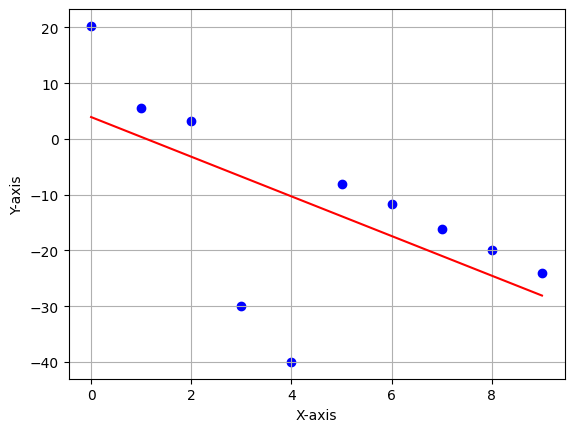

In [3]:
x = np.array([0, 1,2, 3, 4, 5,6,7,8,9]).reshape(-1, 1)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])


model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)



In [4]:
m = model.coef_[0]
c = model.intercept_

print(m,c)

-3.557272727272728 3.916727272727277


#### Task 4

In [5]:
def loss(y_i, y_ihat, beta):
    N = 10
    return (1/N) * np.sum(((y_i - y_ihat)**2) / (((y_i - y_ihat)**2)+ (beta)**2 ))


In [6]:
y_hat_model1 = -4 * x.flatten() + 12
y_hat_model2 = -3.55 * x.flatten() + 3.91

In [12]:
L1_m1 = loss(y, y_hat_model1, beta=1)
L1_m2 = loss(y, y_hat_model2, beta=1)

L2_m1= loss(y, y_hat_model1, beta=1e-6)
L2_m2 = loss(y, y_hat_model2, beta=1e-6)

L3_m1 = loss(y, y_hat_model1, beta=1e3)
L3_m2 = loss(y, y_hat_model2, beta=1e3)

# Create headers
print(f"{'β value':<10} {'Loss (Model 1)':<20} {'Loss (Model 2)':<20}")
print("-" * 50)

# Print rows
print(f"{'β = 1':<10} {L1_m1:<20} {L1_m2:<20}")
print(f"{'β = 1e-6':<10} {L2_m1:<20} {L2_m2:<20}")
print(f"{'β = 1e3':<10} {L3_m1:<20} {L3_m2:<20}")


β value    Loss (Model 1)       Loss (Model 2)      
--------------------------------------------------
β = 1      0.435416262490386    0.9728470518681676  
β = 1e-6   0.9999999998258207   0.9999999999999718  
β = 1e3    0.0002268287498440988 0.00018824684654645654


#### Task 5

The most appropriate choice is β = 1, as it achieves a good balance in handling outliers. When β = 1e-6, the loss tends toward 1 for nearly all data points, making it impossible for the estimator to separate normal samples from outliers. On the other hand, with β = 1e3, the loss collapses close to zero for all residuals, eliminating any meaningful penalization. In contrast, β = 1 preserves a quadratic penalty for small residuals (representing normal data), while capping the influence of large residuals at 1. This ensures that outliers are mitigated without disregarding the actual data distribution.

#### Task 6

In [14]:
if L1_m1 < L1_m2:
    print("Model 1 is better as it has a lower loss")

else:
    print("Model 2 is better as it has a lower loss")

Model 1 is better as it has a lower loss


#### Task 7

The robust estimator reduces the impact of outliers through the specific form of its loss function, which effectively caps the contribution of any single data point to the overall loss. For normal points, the squared residual $(y_i - \hat{y}_i)^2$ is small compared to the hyperparameter $\beta^2$, so the fraction $(y_i - \hat{y}_i)^2 / ((y_i - \hat{y}_i)^2 + \beta^2)$ behaves similarly to standard quadratic loss, allowing these points to influence the model normally. For outliers, where $(y_i - \hat{y}_i)^2$ is very large, the fraction approaches 1, effectively limiting the maximum contribution of outliers and preventing them from disproportionately skewing the estimated parameters. The hyperparameter $\beta$ controls the sensitivity of this capping: a small $\beta$ may cap even small residuals too early, reducing their influence, while a large $\beta$ makes the estimator behave more like ordinary least squares, allowing outliers to dominate. By carefully choosing $\beta$, the estimator balances accurate fitting for normal data while mitigating the effect of outliers, ensuring that the model is robust without ignoring valid variations in the data.


#### Task 8

Alternative Loss Function: Huber Loss

The Huber loss combines MSE and MAE; it behaves like squared error for small residuals and like absolute error for large residuals. This makes it smooth for optimization while reducing the impact of outliers.

In [17]:
def print_huber_formula():
    formula = """
    Huber Loss Lδ(r) = 
        {  0.5 * r^2                      if |r| ≤ δ
        {  δ * (|r| - 0.5 * δ)            if |r| > δ
    """
    print(formula)

print_huber_formula()



    Huber Loss Lδ(r) = 
        {  0.5 * r^2                      if |r| ≤ δ
        {  δ * (|r| - 0.5 * δ)            if |r| > δ
    


### 2. Loss function

In [19]:
y = 1
y_hat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

mse = (y - y_hat) ** 2

y_pred_clipped = np.clip(y_hat, 1e-7, 1 - 1e-7)
bce = -1 * ((y * np.log(y_pred_clipped)) + ((1 - y) * np.log(1 - y_pred_clipped)))

print("True y=1    | Prediction    | MSE       | BCE")
for yp, m, b in zip(y_hat, mse, bce):
    print(f"   1   |     {yp:.3f}         | {m:.6f}   | {b:.6f}")

True y=1    | Prediction    | MSE       | BCE
   1   |     0.005         | 0.990025   | 5.298317
   1   |     0.010         | 0.980100   | 4.605170
   1   |     0.050         | 0.902500   | 2.995732
   1   |     0.100         | 0.810000   | 2.302585
   1   |     0.200         | 0.640000   | 1.609438
   1   |     0.300         | 0.490000   | 1.203973
   1   |     0.400         | 0.360000   | 0.916291
   1   |     0.500         | 0.250000   | 0.693147
   1   |     0.600         | 0.160000   | 0.510826
   1   |     0.700         | 0.090000   | 0.356675
   1   |     0.800         | 0.040000   | 0.223144
   1   |     0.900         | 0.010000   | 0.105361
   1   |     1.000         | 0.000000   | 0.000000


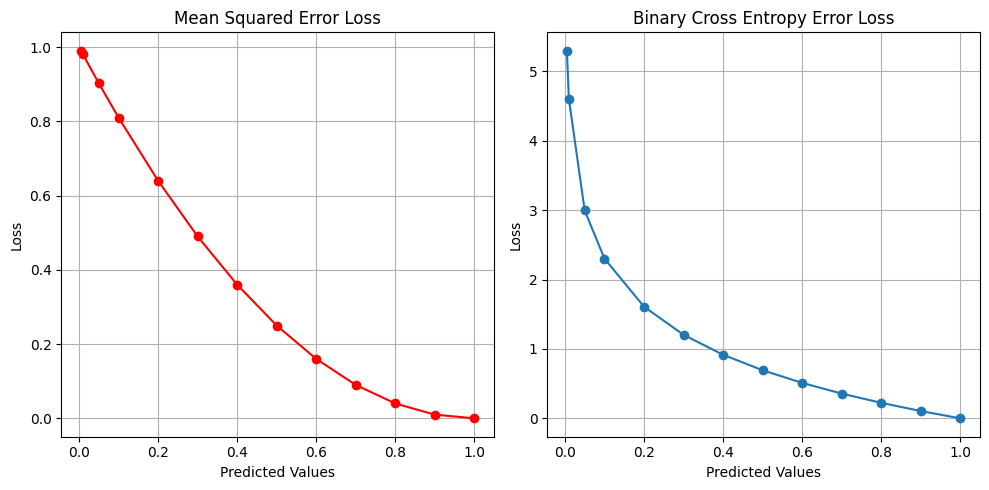

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(y_hat, mse, label ="MSE Loss",marker='o',color = 'red')
plt.title("Mean Squared Error Loss")
plt.xlabel("Predicted Values")
plt.ylabel('Loss')
plt.grid(True)



plt.subplot(1,2,2)
plt.plot(y_hat,bce,label = 'BCE Loss', marker='o')
plt.title("Binary Cross Entropy Error Loss")
plt.xlabel("Predicted Values")
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()


#### Task 2

For Application 1, where the dependent variable is continuous and a Linear Regression model is used, the Mean Squared Error (MSE) is the most suitable loss function. MSE directly measures the squared difference between the predicted and actual values, ensuring that the model minimizes large deviations and produces accurate predictions for continuous outcomes. On the other hand, for Application 2, where the dependent variable is binary (
𝑦
∈
{
0
,
1
}
y∈{0,1}) and a Logistic Regression model is applied, the Binary Cross-Entropy (BCE) loss is more appropriate. BCE evaluates the difference between the predicted probability and the actual binary class, heavily penalizing confident but incorrect predictions. This makes it highly effective for classification problems, as it aligns with the probabilistic nature of logistic regression outputs. Thus, MSE is preferred for continuous prediction tasks, while BCE is best suited for binary classification.

### 3. Data Pre-processing

In [34]:
def generate_signal(signal_length, num_nonzero):
 signal = np.zeros(signal_length)
 nonzero_indices = np.random.choice(signal_length, num_nonzero,
 replace=False)
 nonzero_values = 10*np.random.randn(num_nonzero)
 signal[nonzero_indices] = nonzero_values
 return signal
signal_length = 100 # Total length of the signal
num_nonzero = 10
 # Number of non-zero elements in the signal 




In [39]:
your_index_no= 220097   # Enter your index no without english letters and without leading zeros
 
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10
if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30
  sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )
#epsilon=epsilon[:, np.newaxis]

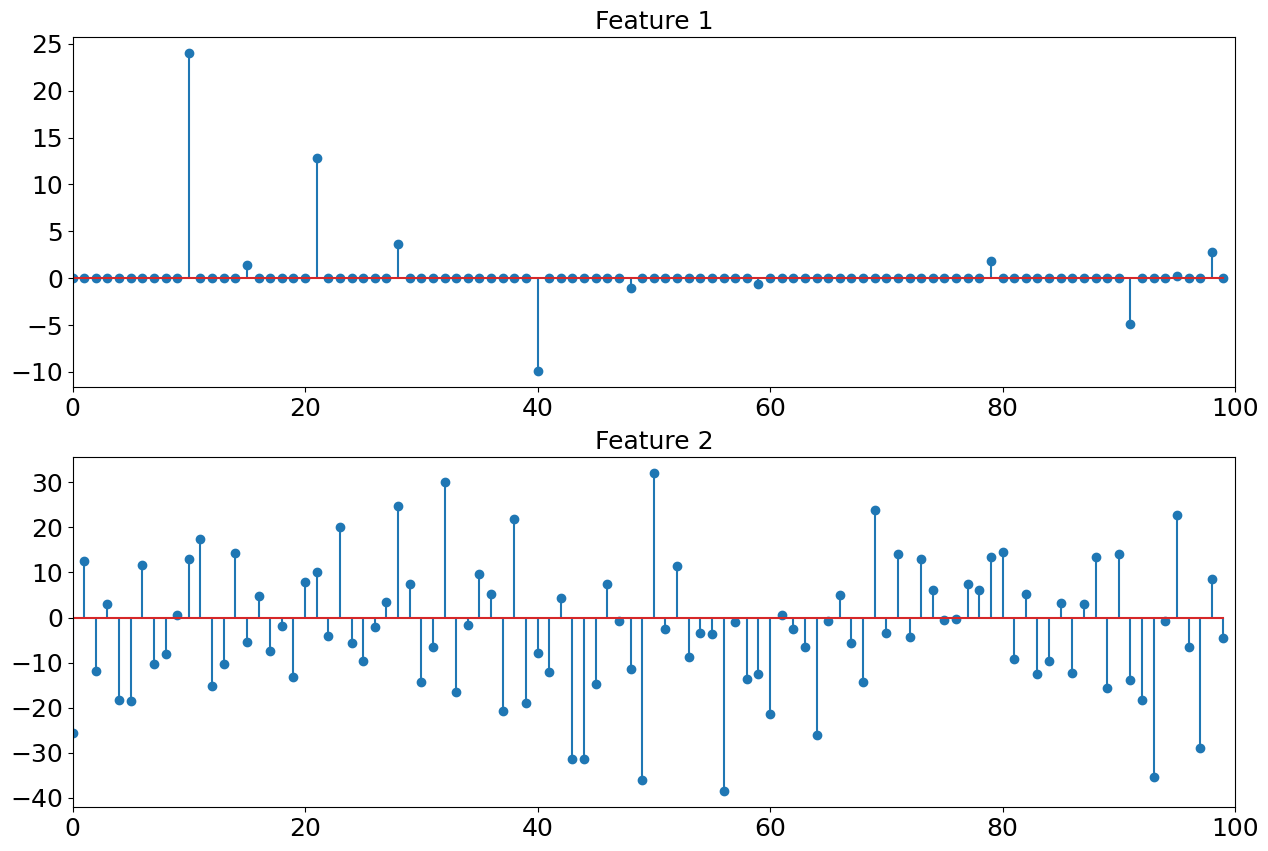

In [40]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

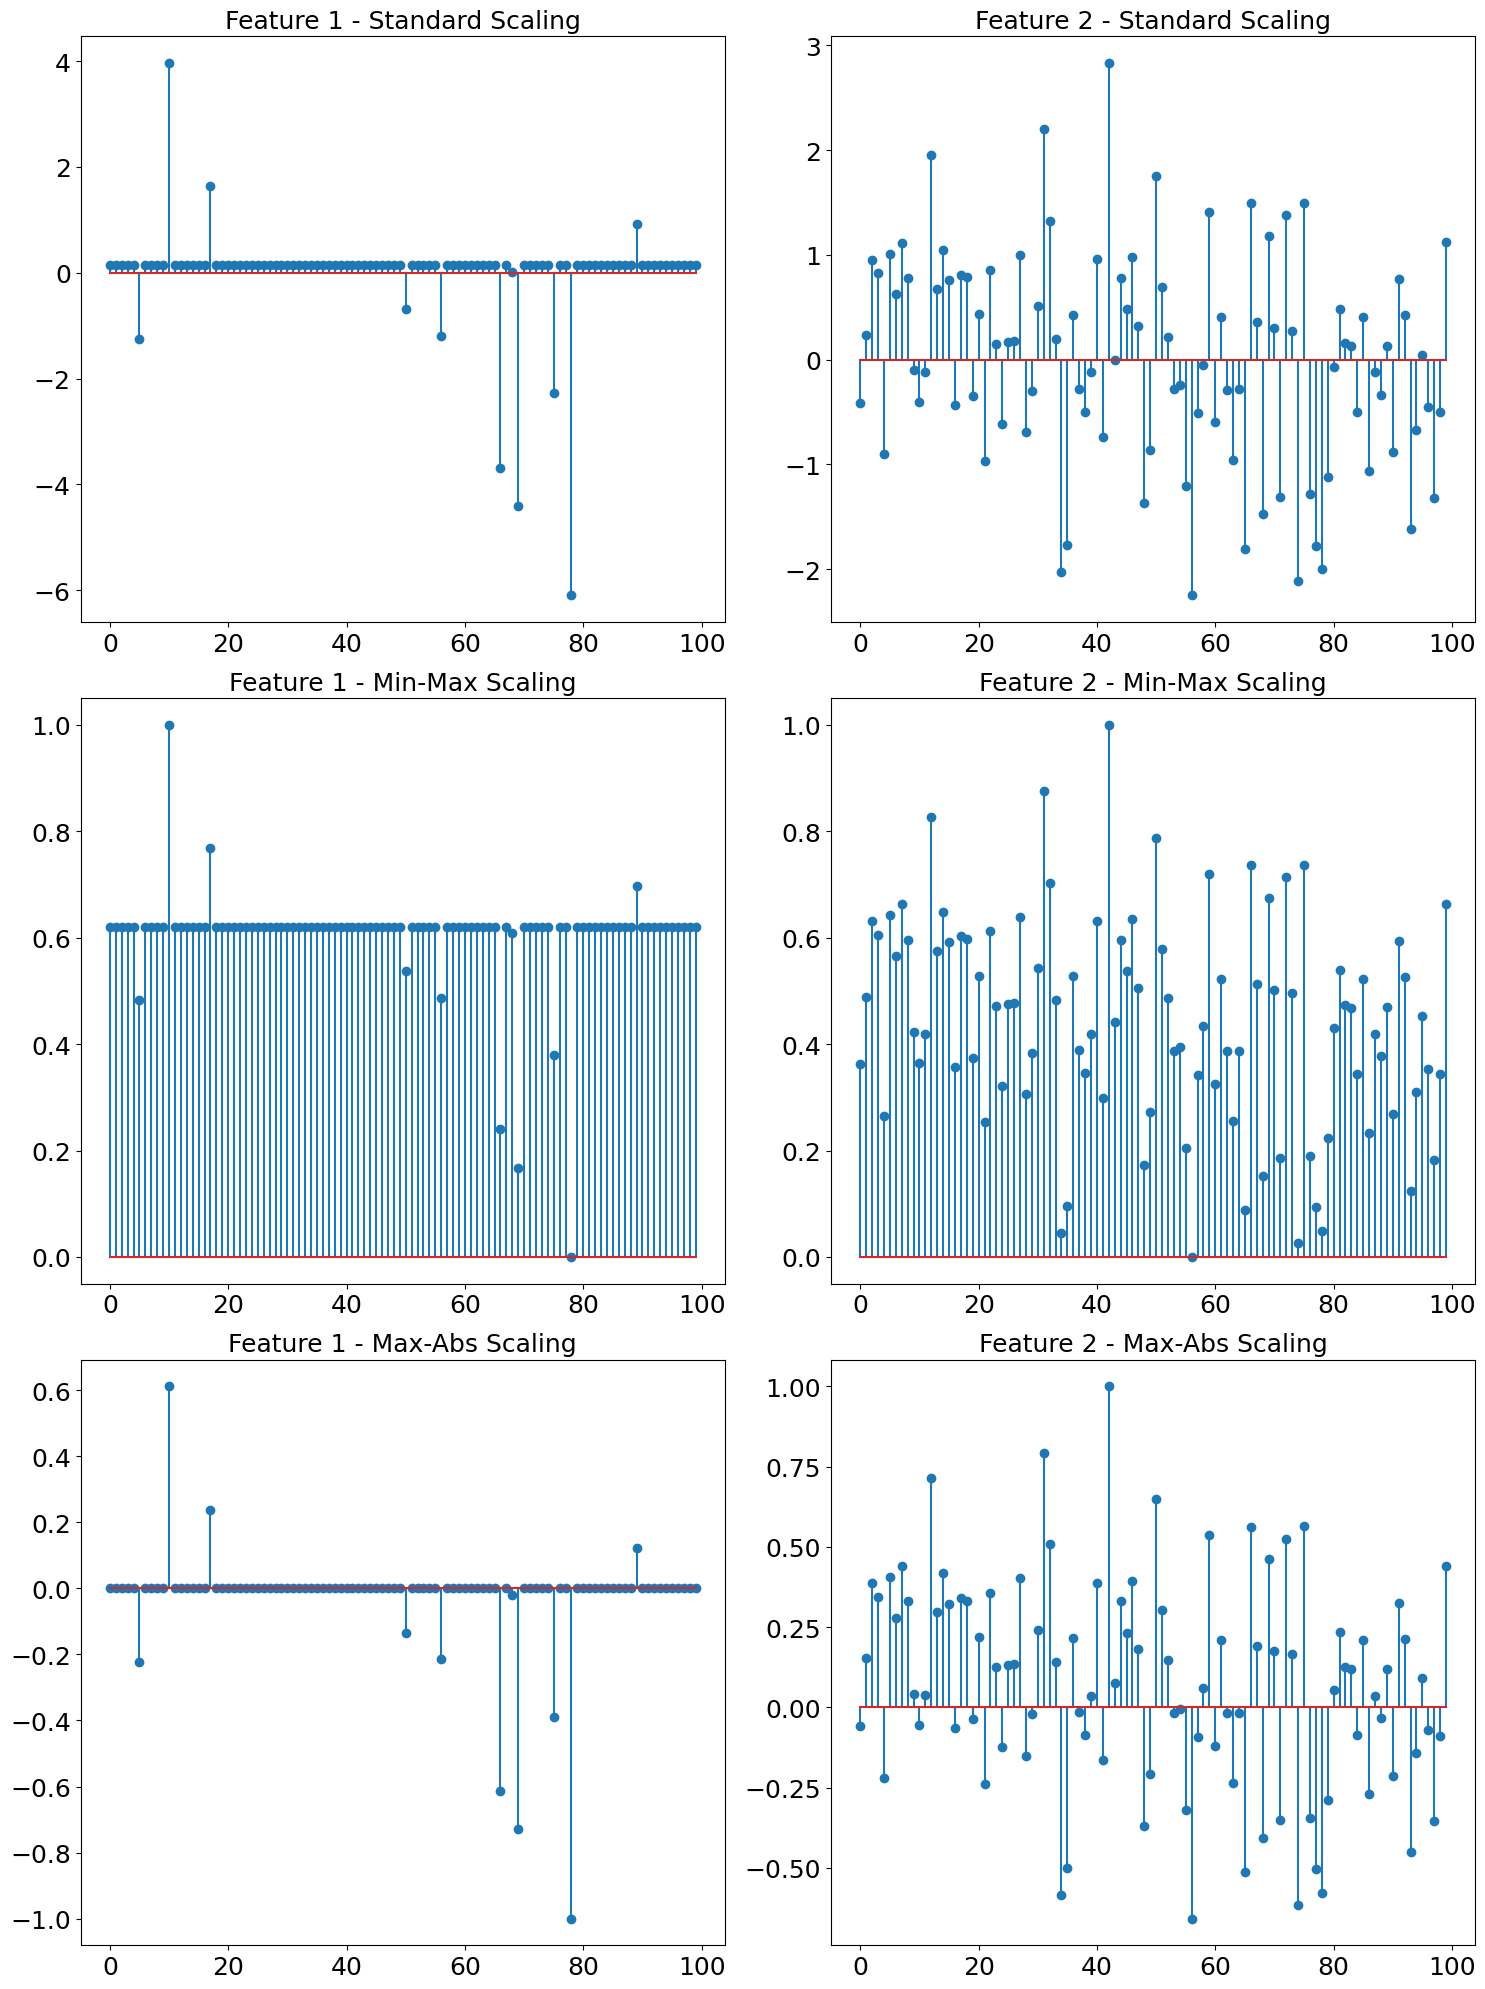

In [33]:
# Generate signals
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100
num_nonzero = 10
your_index_no = 42  # Replace with your actual index number
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5
epsilon = np.random.normal(0, 15, signal_length)

# Scaling methods
def standard_scaling(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def max_abs_scaling(data):
    max_val = np.max(np.abs(data))
    return data / max_val

# Apply scaling to both features
feature1_standard = standard_scaling(sparse_signal)
feature1_minmax = min_max_scaling(sparse_signal)
feature1_maxabs = max_abs_scaling(sparse_signal)

feature2_standard = standard_scaling(epsilon)
feature2_minmax = min_max_scaling(epsilon)
feature2_maxabs = max_abs_scaling(epsilon)

# Plotting
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
plt.title("Feature 1 - Standard Scaling", fontsize=18)
plt.stem(feature1_standard)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3, 2, 2)
plt.title("Feature 2 - Standard Scaling", fontsize=18)
plt.stem(feature2_standard)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3, 2, 3)
plt.title("Feature 1 - Min-Max Scaling", fontsize=18)
plt.stem(feature1_minmax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3, 2, 4)
plt.title("Feature 2 - Min-Max Scaling", fontsize=18)
plt.stem(feature2_minmax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3, 2, 5)
plt.title("Feature 1 - Max-Abs Scaling", fontsize=18)
plt.stem(feature1_maxabs)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3, 2, 6)
plt.title("Feature 2 - Max-Abs Scaling", fontsize=18)
plt.stem(feature2_maxabs)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

For Feature 1, which represents a sparse signal, MaxAbs scaling was applied because it preserves the sparsity by leaving zero values intact, retains the sign of non-zero elements, and normalizes values based on the maximum absolute magnitude without altering the sparse structure. For Feature 2, which contains Gaussian noise, Standard scaling was chosen as it shifts the data to have zero mean and adjusts it to unit variance, thereby maintaining its Gaussian nature while ensuring that the feature magnitudes are comparable for subsequent processing. In summary, MaxAbs scaling is best suited for sparse signals, whereas Standard scaling is more appropriate for normally distributed data, since alternative scaling methods could distort the intrinsic characteristics of each feature.